# Homework 3 - Berkeley STAT 157

Handout 2/5/2019, due 2/12/2019 by 4pm in Git by committing to your repository.

**Formatting: please include both a .ipynb and .pdf file in your homework submission, named homework3.ipynb and homework3.pdf. You can export your notebook to a pdf either by File -> Download as -> PDF via Latex (you may need Latex installed), or by simply printing to a pdf from your browser (you may want to do File -> Print Preview in jupyter first). Please don't change the filename.**       

In [1]:
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

# 1. Logistic Regression for Binary Classification

In multiclass classification we typically use the exponential model 

$$p(y|\textbf{o}) = \textrm{softmax}(\textbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\textbf{o}$ and $\textbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.
1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $o$ for $o \to \infty$ and to $\exp(o)$ for $o \to -\infty$. 

## part 1

$ p (y | \textbf o + c) = softmax(\textbf o + c)_y$

$= \frac{exp(o_y + c)}{\sum_{y'} exp(o_y' + c)}$

$= \frac{exp(o_y + c)}{\sum_{y'} exp(o_{y'} + c)}$

$= \frac{exp(o_y)exp(c)}{\sum_{y'} exp(o_{y'}) exp(c)}$

### *$e^c$ cancels in numerator & denominator*

$= \frac{exp(o_y)}{\sum_{y'} exp(o_{y'})}$

$= p(y | \textbf o)$

$\blacksquare$

## part 2

$p(y = 1| o) = \frac {exp(o_1)}{\sum_{y'} exp(o_{y'})}$

$= \frac {exp(o_1)}{exp(o_{-1}) + exp(o_1)}$

$= \frac {exp(o)}{exp(\textbf 0) + exp(o)}$

$= \frac {exp(o)}{1 + exp(o)}$

$= \frac {1} {\frac{1}{exp(o)} + \frac{exp(o)}{exp(o)} }$

$= \frac{1} { exp(o)^{-1} + 1}$

$= \frac{1} { (e^o)^{-1} + 1}$ 

$= \frac{1} { (e^-o) + 1}$

$= \frac{1} {1 + exp(-o)}$

$\blacksquare$

## part 3

$-log p(y|o) = - \sum_{i} y_i log ( \hat y_i)$

$= -y log( \hat y_i)$

$= -y log( softmax(o) )$

$= -y log \left(\frac {exp(o)}{\sum_i exp(o_i} \right)$

$= y log \left[ \left(\frac {exp(o)}{\sum_i exp(o_i)} \right)^{-1} \right]$



$= y log \left(\frac {\sum_i exp(o_i}{exp(o)} \right)$

$= y log \left(\frac {exp(o_{-1}) + exp(o_1)} {exp(o)} \right)$

$= y log \left(\frac {exp({\textbf 0}) + exp(o)} {exp(o)} \right)$

$= y log \left(\frac {1 + exp(o)} {exp(o)} \right)$

$= y log \left(\frac {1} {exp(o)} + 1 \right)$

$= y log \left(exp(o)^{-1} + 1 \right)$

$= y log \left(exp(-o) + 1 \right)$

$= log \left [ (1 + exp(-o) )^y \right ]$

$= log \left [ 1^y + exp(-o)^y \right ]$

$= log \left [ 1 + exp(-o\cdot y) \right ]$

$= log \left [ 1 + exp(-y\cdot o) \right ]$

$\blacksquare$

## part 4a

as $o \rightarrow \infty$,

**log($1 + e^{-o}$) $\rightarrow$ log(1) $\rightarrow$ 0 = $o_{-1}$**

## part 4b

$$-log[ p(y=1|o) ] = log [1 + exp(-o)]$$

### **so, as $o \rightarrow \infty$,**

$$\rightarrow log(1 + e^{\infty})$$

$$= log(1 + \infty)$$

$$= \infty$$

### converges to $\infty$


# 2. Logistic Regression and Autograd

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in Gluon
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ using 'autograd'.

In [84]:
# 2.1

def loss(y,o):
    ## add your loss function here
    return nd.log(1 + nd.exp(-y * o))

In [85]:
o = nd.arange(-5, 5, 0.1)
y = nd.arange(-1, 1, .02)
o.attach_grad()
with autograd.record():
    l = loss(y, o)
l.backward()

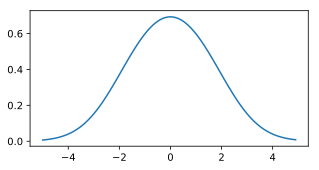

In [86]:
# 2.2
from d2l import set_figsize

set_figsize(figsize=(5, 2.5))
plt.plot(o.asnumpy(), l.asnumpy())

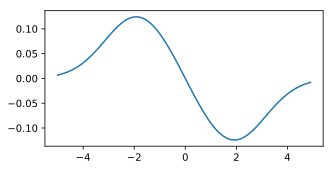

In [87]:
# 2.3

set_figsize(figsize=(5, 2.5))
plt.plot(o.asnumpy(), o.grad.asnumpy())

# 3. Ohm's Law

Imagine that you're a young physicist, maybe named [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm), trying to figure out how current and voltage depend on each other for resistors. You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. So you take some measurements, conveniently given to you as 'ndarrays' in Python. They are indicated by 'current' and 'voltage'.

Your goal is to use least mean squares regression to identify the coefficients for the following three models using automatic differentiation and least mean squares regression. The three models are:

1. Quadratic model where $\mathrm{voltage} = c + r \cdot \mathrm{current} + q \cdot \mathrm{current}^2$.
1. Linear model where $\mathrm{voltage} = c + r \cdot \mathrm{current}$.
1. Ohm's law where $\mathrm{voltage} = r \cdot \mathrm{current}$.

In [2]:
current = nd.array([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
voltage = nd.array([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

## part 1: quadratic model *(from scratch)*

In [92]:
from d2l import data_iter, squared_loss, sgd, linreg

second_var = current**2
var_1 = current.reshape(20, 1)
var_2 = second_var.reshape(20, 1)

features  = nd.concat(var_1, var_2, dim = 1)
labels = voltage

w = nd.random.normal(scale = 0.01, shape = (2,1))
b = nd.zeros(shape = (1,))

w.attach_grad()
b.attach_grad()

In [93]:
net = linreg  
loss = squared_loss  

batch_size = 5
lr = 0.0001
num_epochs = 100

## i ran this 30 times, so 3000 epochs total, for the estimates to converge. didn't want the PDF to be 30+ pages long.

In [126]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 8.057441
epoch 2, loss 8.046292
epoch 3, loss 8.010896
epoch 4, loss 8.007100
epoch 5, loss 7.994840
epoch 6, loss 7.985097
epoch 7, loss 7.984781
epoch 8, loss 7.987340
epoch 9, loss 7.973763
epoch 10, loss 7.962390
epoch 11, loss 7.947775
epoch 12, loss 7.953340
epoch 13, loss 7.987454
epoch 14, loss 7.922862
epoch 15, loss 7.919008
epoch 16, loss 7.902259
epoch 17, loss 7.905784
epoch 18, loss 7.889100
epoch 19, loss 7.877214
epoch 20, loss 7.867025
epoch 21, loss 7.860958
epoch 22, loss 7.858366
epoch 23, loss 7.947656
epoch 24, loss 7.834297
epoch 25, loss 7.827324
epoch 26, loss 7.914720
epoch 27, loss 7.827928
epoch 28, loss 7.806587
epoch 29, loss 7.798125
epoch 30, loss 7.785196
epoch 31, loss 7.788493
epoch 32, loss 7.770140
epoch 33, loss 7.762079
epoch 34, loss 7.860945
epoch 35, loss 7.751613
epoch 36, loss 7.742499
epoch 37, loss 7.733298
epoch 38, loss 7.745149
epoch 39, loss 7.717100
epoch 40, loss 7.712887
epoch 41, loss 7.750579
epoch 42, loss 7.689883
e

In [127]:
print(" r = ", w[0].asscalar(), "\n\n", "q =", w[1].asscalar(), "\n\n", "c = ", b[0].asscalar())

 r =  35.331055 

 q = 0.64558494 

 c =  13.179283


## part 2: linear model (gluon)

In [128]:
from mxnet.gluon import data as gdata, loss as gloss
from d2l import nn 
from mxnet import init

net = nn.Sequential()
net.add(nn.Dense(1))
net.initialize(init.Normal(sigma = 0.01))

loss = gloss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [129]:
batch_size = 5
num_epochs = 100

dataset = gdata.ArrayDataset(current, voltage)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [130]:
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(current), voltage)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 4.818239
epoch 2, loss: 4.384062
epoch 3, loss: 4.817986
epoch 4, loss: 6.278380
epoch 5, loss: 4.811965
epoch 6, loss: 3.666365
epoch 7, loss: 3.571980
epoch 8, loss: 3.644460
epoch 9, loss: 3.334803
epoch 10, loss: 3.437017
epoch 11, loss: 3.141636
epoch 12, loss: 3.386814
epoch 13, loss: 2.906808
epoch 14, loss: 2.825375
epoch 15, loss: 3.068982
epoch 16, loss: 4.162078
epoch 17, loss: 2.649559
epoch 18, loss: 3.038372
epoch 19, loss: 2.617471
epoch 20, loss: 5.743158
epoch 21, loss: 2.493365
epoch 22, loss: 2.178969
epoch 23, loss: 2.124710
epoch 24, loss: 2.058398
epoch 25, loss: 2.022227
epoch 26, loss: 1.946573
epoch 27, loss: 2.057502
epoch 28, loss: 1.921635
epoch 29, loss: 1.771373
epoch 30, loss: 2.572592
epoch 31, loss: 1.849800
epoch 32, loss: 1.706146
epoch 33, loss: 1.721513
epoch 34, loss: 1.798129
epoch 35, loss: 1.735896
epoch 36, loss: 1.520482
epoch 37, loss: 1.653411
epoch 38, loss: 1.671662
epoch 39, loss: 1.365107
epoch 40, loss: 1.347510
epoch 41,

In [45]:
params = net.collect_params()
values = []
for param in params.values():
    values += [param.data()[0].asscalar()]

print(" r =", values[0], "\n\n", "c =", values[1])

 r = 41.79493 

 c = 1.410167


## part 3 (gluon)

In [3]:
from mxnet.gluon import data as gdata, loss as gloss
from d2l import nn, data_iter
from mxnet import init

net = nn.Sequential()
net.add(nn.Dense(1, use_bias = False))
net.initialize(init.Normal(sigma = 0.01))

loss = gloss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [4]:
features = current.reshape(20, 1)

num_epochs = 100
batch_size = 4
dataset = gdata.ArrayDataset(features, voltage)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [5]:
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), voltage)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.632421
epoch 2, loss: 0.617448
epoch 3, loss: 0.646027
epoch 4, loss: 0.614750
epoch 5, loss: 0.623311
epoch 6, loss: 0.664360
epoch 7, loss: 0.670308
epoch 8, loss: 0.620153
epoch 9, loss: 0.615033
epoch 10, loss: 0.656699
epoch 11, loss: 0.610469
epoch 12, loss: 0.675199
epoch 13, loss: 0.715462
epoch 14, loss: 0.612291
epoch 15, loss: 0.703940
epoch 16, loss: 1.540874
epoch 17, loss: 0.610419
epoch 18, loss: 0.610716
epoch 19, loss: 0.879703
epoch 20, loss: 0.610583
epoch 21, loss: 0.610624
epoch 22, loss: 0.944854
epoch 23, loss: 0.682255
epoch 24, loss: 0.614452
epoch 25, loss: 0.702553
epoch 26, loss: 1.299942
epoch 27, loss: 1.396988
epoch 28, loss: 0.879210
epoch 29, loss: 0.814842
epoch 30, loss: 0.633608
epoch 31, loss: 0.610434
epoch 32, loss: 0.640284
epoch 33, loss: 0.939271
epoch 34, loss: 0.706373
epoch 35, loss: 0.884549
epoch 36, loss: 0.747642
epoch 37, loss: 0.850730
epoch 38, loss: 0.754572
epoch 39, loss: 0.825027
epoch 40, loss: 1.156675
epoch 41,

In [6]:
r = net[0].weight.data()[0]
print("r = ", r.asscalar())

r =  42.12359


# 4. Entropy

Let's compute the *binary* entropy of a number of interesting data sources. 

1. Assume that you're watching the output generated by a [monkey at a typewriter](https://en.wikipedia.org/wiki/File:Chimpanzee_seated_at_typewriter.jpg). The monkey presses any of the $44$ keys of the typewriter at random (you can assume that it has not discovered any special keys or the shift key yet). How many bits of randomness per character do you observe?
1. Unhappy with the monkey you replaced it by a drunk typesetter. It is able to generate words, albeit not coherently. Instead, it picks a random word out of a vocabulary of $2,000$ words. Moreover, assume that the average length of a word is $4.5$ letters in English. How many bits of randomness do you observe now?
1. Still unhappy with the result you replace the typesetter by a high quality language model. These can obtain perplexity numbers as low as 20 points per character. The perplexity is defined as a length normalized probability, i.e.

$$\mathrm{PPL}(x) = \left[p(x)\right]^{1/\mathrm{length}(x)}$$

In [7]:
# part 1

probs = nd.ones((44,)) / 44

sum(-probs*nd.log(probs))/nd.log(nd.array([2])) 


[5.4594293]
<NDArray 1 @cpu(0)>

In [8]:
# part 2 ?????

probs_2 = nd.ones((2000,))*(1/2000)#*(1/26)
sum(-probs_2 * nd.log(probs_2))/nd.log(nd.array([2])) / 4.5


[2.436808]
<NDArray 1 @cpu(0)>

In [9]:
# part 2 ?????

probs_3 = nd.ones((2000,))*(1/2000)#*(1/26)
h_word = sum(-probs_2 * nd.log(probs_2))

2**h_word


[194.11934]
<NDArray 1 @cpu(0)>

$$\mathrm{PPL}(x) = \left[p(x)\right]^{1/\mathrm{length}(x)}$$

$$\mathrm{PPL}(x) = 2^H[x] $$

$$4.5*20 \leq 2^H[x] $$

$$\frac{log(90)}{log(2)} \leq H[x]$$

then,

$\frac{H[x]}{log(2)} =$ randomness per word

$\frac { \left( \frac{H[x]}{log(2)} \right) } {4.5} =$ randomness per character 

### **thus,**

randomness per character = $\frac { \left (\frac {log(90)}{log(2)} \right )}{log(2)*4.5}$


In [90]:
rpc = np.log2(90)/(np.log(2)*4.5)

print("randomness of character = ", rpc)

randomness of character =  2.0812809485009964


In [91]:
# part 3

### assumptions ###
n_words = 2000
avg_word_len = 4.5

### randomness ###


### a few of us on the class forum were confused about 4.3. we weren't sure what was being asked here so i wrote down my assumptions and solved for randomness per character.


https://discuss.mxnet.io/t/hw3-4-3/3168 (link to question)

### i also used this source to find a formula relating perplexity of a word to entropy of a word. 

+ formula : $PPL(x) = \hat H$, where $\hat H$ = entropy of a word.

+ i assumed that PPL(x) means perplexity of a word

+ also found : randomness per word = randomness per character * length of word

+ assumed : $\frac {\hat H}{log(2)}$ = randomness per word.


### **source:**
http://www1.icsi.berkeley.edu/Speech/docs/HTKBook3.2/node188_mn.html

# 5. Wien's Approximation for the Temperature (bonus)

We will now abuse Gluon to estimate the temperature of a black body. The energy emanated from a black body is given by Wien's approximation.

$$B_\lambda(T) = \frac{2 h c^2}{\lambda^5} \exp\left(-\frac{h c}{\lambda k T}\right)$$

That is, the amount of energy depends on the fifth power of the wavelength $\lambda$ and the temperature $T$ of the body. The latter ensures a cutoff beyond a temperature-characteristic peak. Let us define this and plot it.

In [ ]:
# Lightspeed
c = 299792458
# Planck's constant
h = 6.62607004e-34
# Boltzmann constant
k = 1.38064852e-23
# Wavelength scale (nanometers)
lamscale = 1e-6
# Pulling out all powers of 10 upfront
p_out = 2 * h * c**2 / lamscale**5
p_in = (h / k) * (c/lamscale) 

# Wien's law
def wien(lam, t):
    return (p_out / lam**5) * nd.exp(-p_in / (lam * t))

# Plot the radiance for a few different temperatures
lam = nd.arange(0,100,0.01)
for t in [10, 100, 150, 200, 250, 300, 350]:
    radiance = wien(lam, t)
    plt.plot(lam.asnumpy(), radiance.asnumpy(), label=('T=' + str(t) + 'K'))
plt.legend()
plt.show()

Next we assume that we are a fearless physicist measuring some data. Of course, we need to pretend that we don't really know the temperature. But we measure the radiation at a few wavelengths.  

In [ ]:
# real temperature is approximately 0C
realtemp = 273
# we observe at 3000nm up to 20,000nm wavelength
wavelengths = nd.arange(3,20,2)
# our infrared filters are pretty lousy ...
delta = nd.random_normal(shape=(len(wavelengths))) * 1

radiance = wien(wavelengths + delta,realtemp)
plt.plot(wavelengths.asnumpy(), radiance.asnumpy(), label='measured')
plt.plot(wavelengths.asnumpy(), wien(wavelengths, realtemp).asnumpy(), label='true')
plt.legend()
plt.show()

Use Gluon to estimate the real temperature based on the variables `wavelengths` and `radiance`. 

* You can use Wien's law implementation `wien(lam,t)` as your forward model. 
* Use the loss function $l(y,y') = (\log y - \log y')^2$ to measure accuracy.